In [6]:
import pandas as pd
import numpy as np

df = pd.read_csv("/content/heart_disease.csv")

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63.0,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,FALSE,2.3,downsloping,fixed defect,0.0
1,41.0,Male,atypical angina,135.0,203.0,False,normal,132.0,FALSE,0.0,flat,fixed defect,0.0
2,57.0,Male,asymptomatic,140.0,192.0,False,normal,148.0,FALSE,0.4,flat,fixed defect,0.0
3,52.0,Male,typical angina,118.0,186.0,False,lv hypertrophy,190.0,FALSE,0.0,flat,fixed defect,0.0
4,57.0,Male,asymptomatic,110.0,201.0,False,normal,126.0,TRUE,1.5,flat,fixed defect,0.0


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    float64
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    float64
 4   chol      908 non-null    float64
 5   fbs       908 non-null    object 
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    float64
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    float64
dtypes: float64(6), object(7)
memory usage: 101.6+ KB


In [8]:
df.isnull().sum()

,0
age,91
sex,91
cp,91
trestbps,91
chol,91
fbs,91
restecg,91
thalch,91
exang,91
oldpeak,153


In [9]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


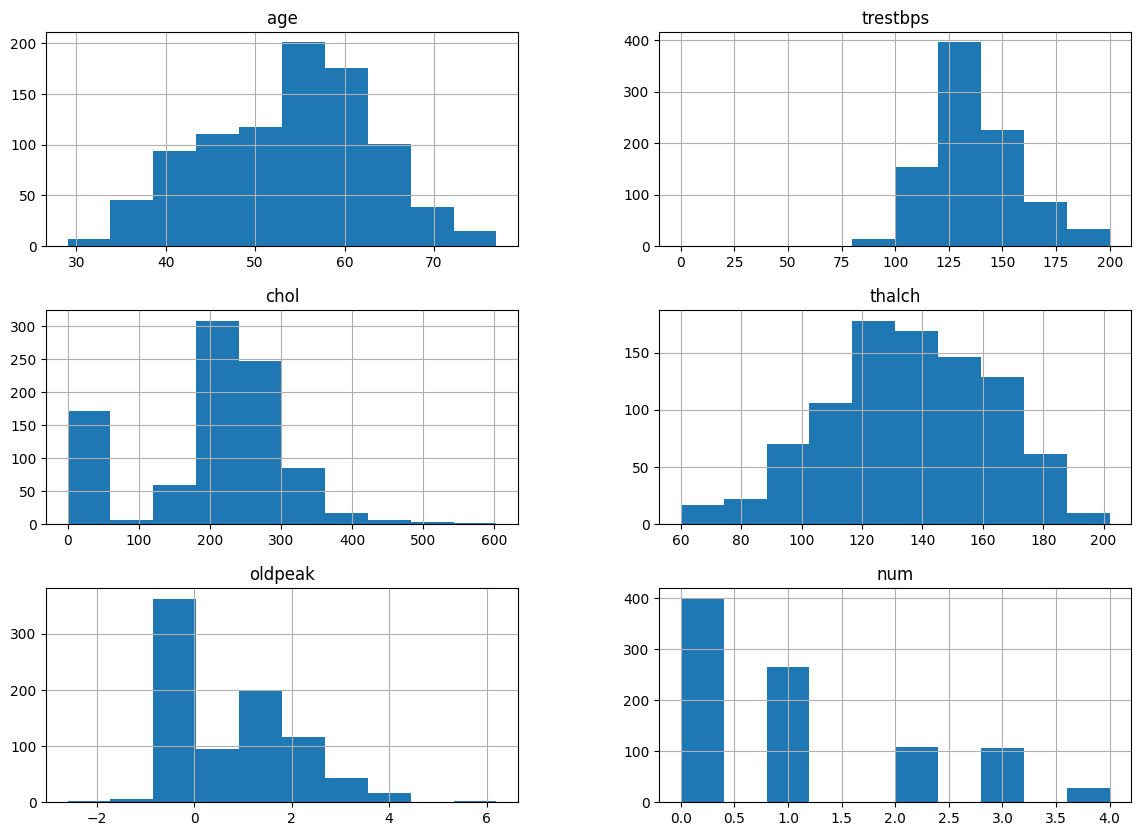

In [10]:
import matplotlib.pyplot as plt

df.hist(figsize=(14,10))
plt.show()


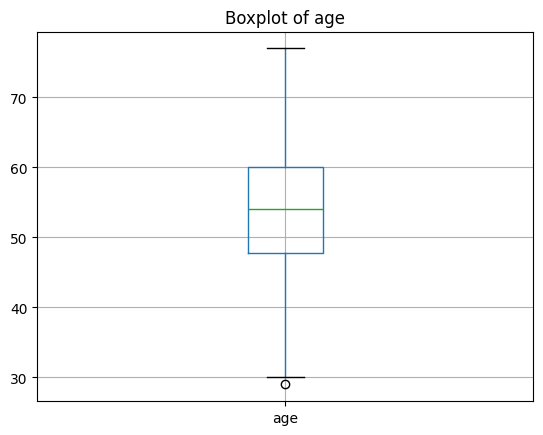

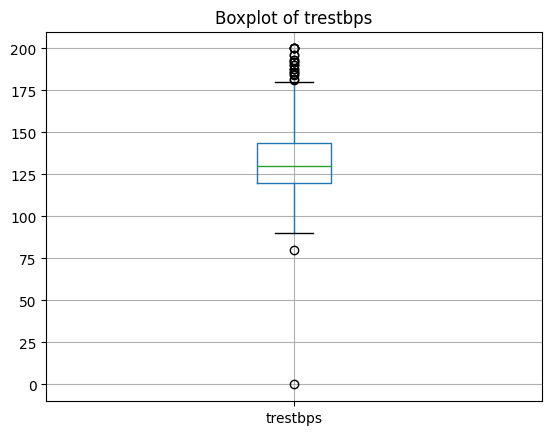

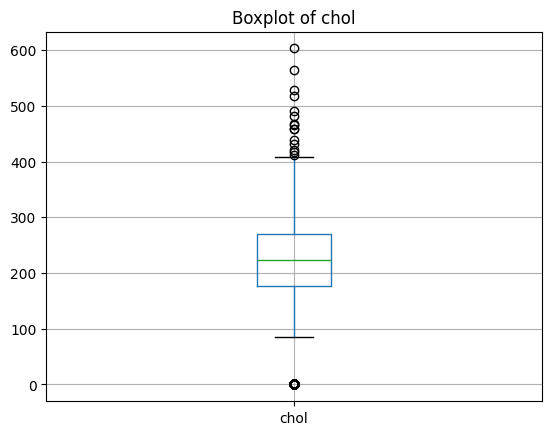

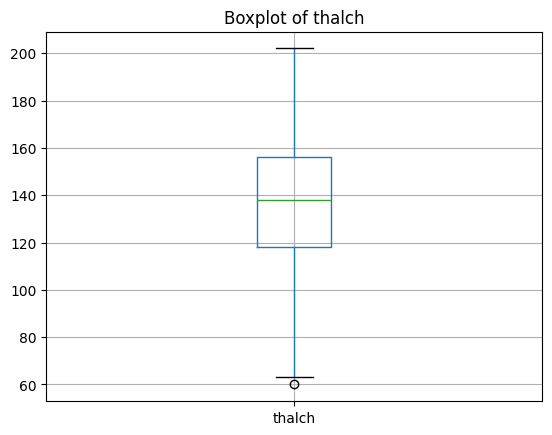

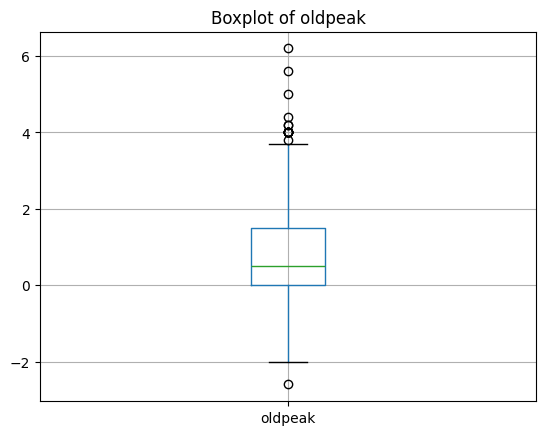

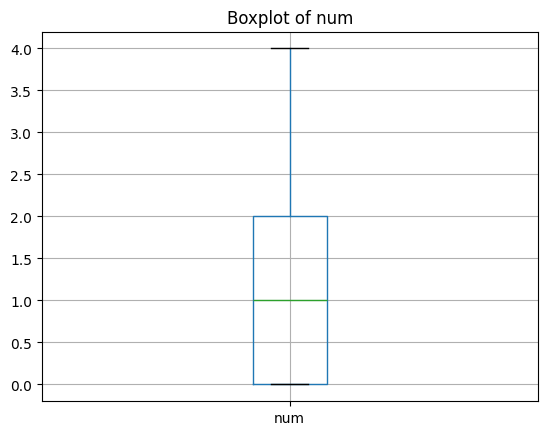

In [11]:
for col in df.select_dtypes(include=np.number).columns:
    plt.figure()
    df.boxplot(column=col)
    plt.title(f'Boxplot of {col}')
    plt.show()


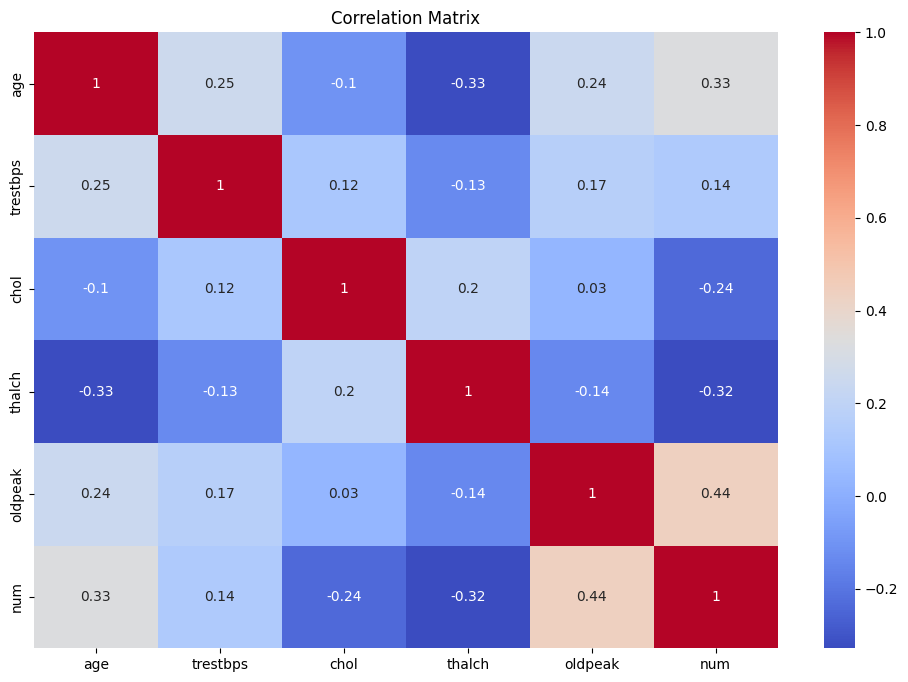

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [13]:
df['num'] = df['num'].apply(lambda x: 1 if x > 0 else 0)


In [17]:
# Separate columns
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

num_cols, cat_cols


(Index(['age', 'trestbps', 'chol', 'thalch', 'oldpeak'], dtype='object'),
 Index(['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal'], dtype='object'))

In [18]:
from sklearn.impute import SimpleImputer

# Imputers
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

# Apply imputers
X[num_cols] = num_imputer.fit_transform(X[num_cols])
X[cat_cols] = cat_imputer.fit_transform(X[cat_cols])


In [19]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

for col in cat_cols:
    X[col] = encoder.fit_transform(X[col])


In [20]:
# Separate features and target
X = df.drop('num', axis=1)
y = df['num']

# Binary target
y = y.apply(lambda x: 1 if x > 0 else 0)

# Separate column types
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

# Imputation
from sklearn.impute import SimpleImputer

X[num_cols] = SimpleImputer(strategy='median').fit_transform(X[num_cols])
X[cat_cols] = SimpleImputer(strategy='most_frequent').fit_transform(X[cat_cols])

# Encoding
from sklearn.preprocessing import LabelEncoder

for col in cat_cols:
    X[col] = LabelEncoder().fit_transform(X[col])


In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [22]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [23]:
from sklearn.metrics import (
    accuracy_score, classification_report,
    confusion_matrix, roc_auc_score
)

y_pred = dt.predict(X_test)
y_prob = dt.predict_proba(X_test)[:,1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))


Accuracy: 0.7

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.73      0.71        98
           1       0.72      0.67      0.69       102

    accuracy                           0.70       200
   macro avg       0.70      0.70      0.70       200
weighted avg       0.70      0.70      0.70       200

ROC-AUC: 0.7006802721088434


In [24]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

grid.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10, None],
                         'min_samples_split': [2, 5, 10]},
             scoring='f1')

In [25]:
best_model = grid.best_estimator_
grid.best_params_


{'criterion': 'entropy', 'max_depth': 7, 'min_samples_split': 5}

In [26]:
y_pred_best = best_model.predict(X_test)
y_prob_best = best_model.predict_proba(X_test)[:,1]

print("Tuned Accuracy:", accuracy_score(y_test, y_pred_best))
print("Tuned ROC-AUC:", roc_auc_score(y_test, y_prob_best))


Tuned Accuracy: 0.72
Tuned ROC-AUC: 0.7859143657462986


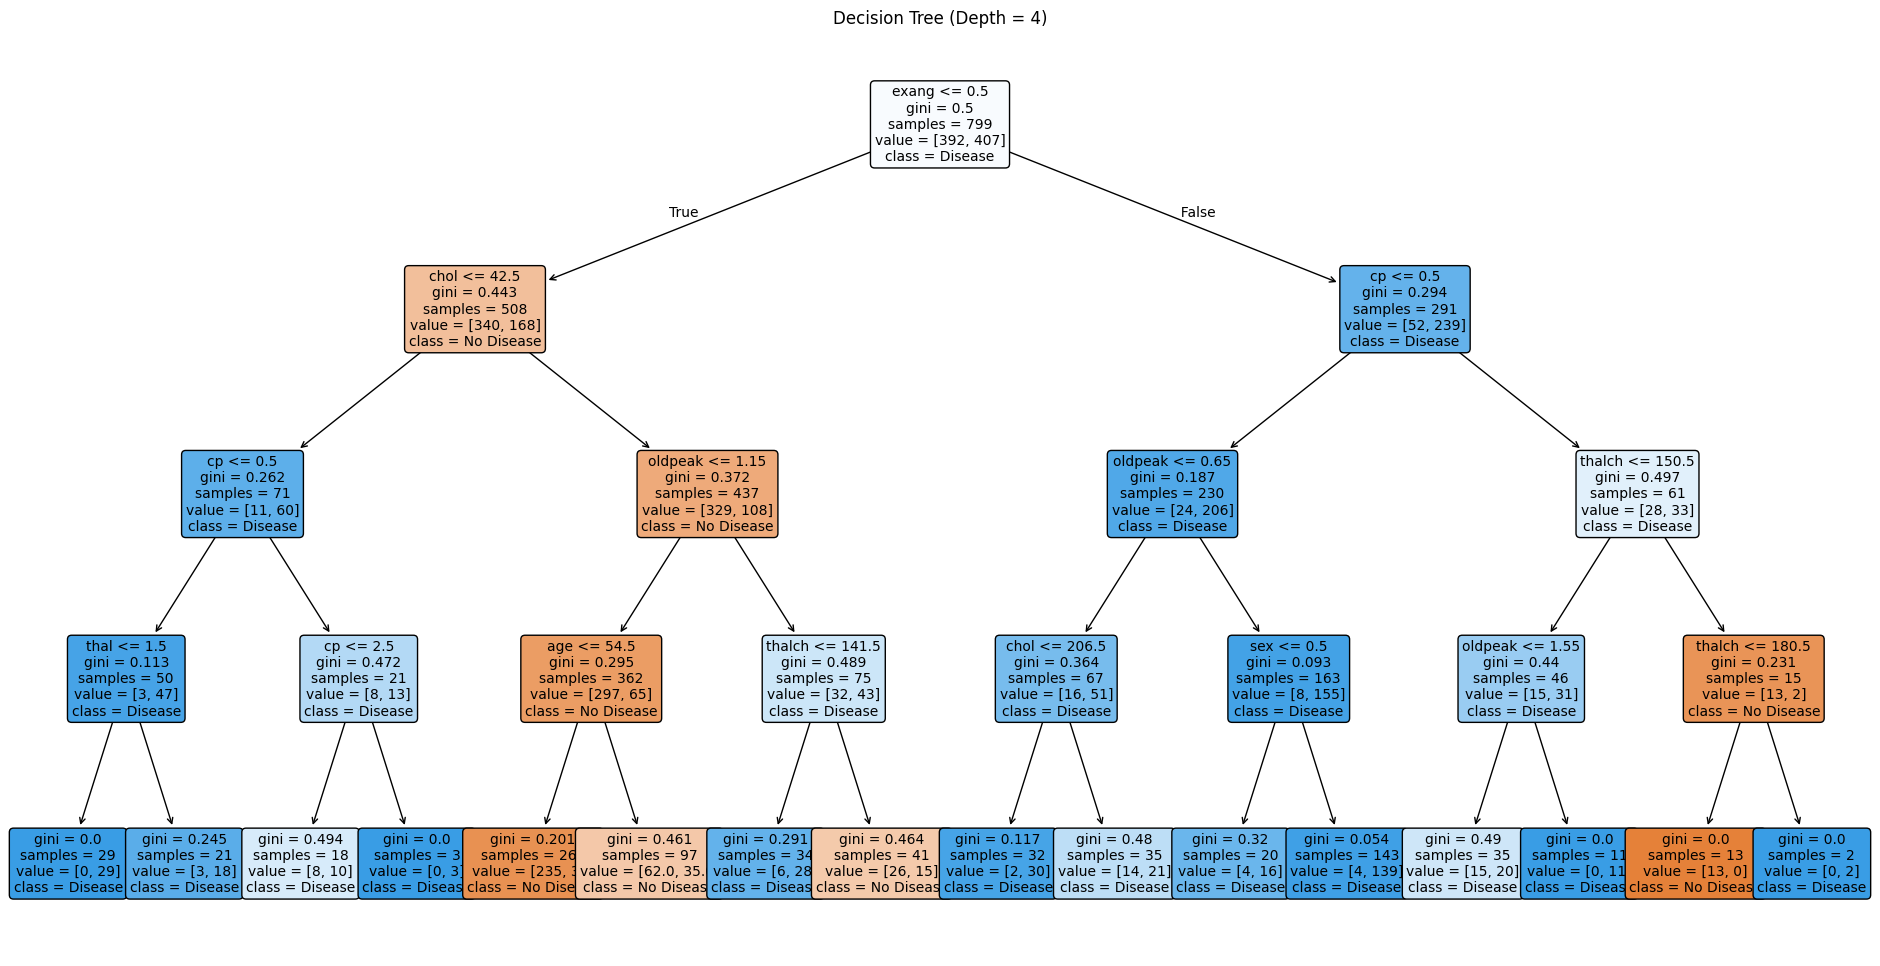

In [31]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

dt_viz = DecisionTreeClassifier(
    max_depth=4,
    random_state=42
)

dt_viz.fit(X_train, y_train)

plt.figure(figsize=(24,12))
plot_tree(
    dt_viz,
    feature_names=X.columns,
    class_names=['No Disease', 'Disease'],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree (Depth = 4)")
plt.show()


In [32]:
importances = pd.Series(
    best_model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

importances


,0
exang,0.256409
chol,0.187245
oldpeak,0.115905
cp,0.114536
age,0.104445
trestbps,0.100540
thalch,0.061335
slope,0.028975
sex,0.016344
thal,0.014265


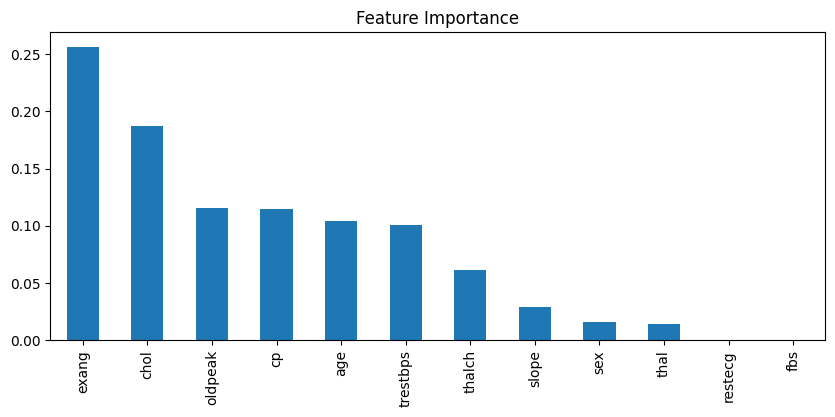

In [34]:
importances.plot(kind='bar', figsize=(10,4))
plt.title("Feature Importance")
plt.show()
